In [ ]:
import numpy as np

# 输入数据：2个样本，每个样本有2个特征（面积、房间数）
X = np.array([[50, 2],
              [80, 3]])

y = np.array([200, 320])  # 实际房价（单位：万元）

# 初始化参数
w = np.array([2, 10])  # 权重
b = 50                # 偏置

# 非向量化预测
y_pred = []
for i in range(len(X)):
    pred = np.dot(w, X[i]) + b  # 手动算每个样本
    y_pred.append(pred)

print("非向量化预测结果:", y_pred)

# 向量化预测（直接用矩阵乘法）
y_pred_vec = X.dot(w) + b

print("向量化预测结果:", y_pred_vec)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# 生成示例数据
np.random.seed(0)
x = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(x).ravel() + np.random.normal(0, 0.5, x.shape[0])

# 欠拟合模型
degree_underfit = 1
pipeline_underfit = Pipeline([
    ('poly', PolynomialFeatures(degree=degree_underfit)),
    ('linear', LinearRegression())
])
pipeline_underfit.fit(x, y)
y_underfit = pipeline_underfit.predict(x)

# 正常拟合模型
degree_fit = 3
pipeline_fit = Pipeline([
    ('poly', PolynomialFeatures(degree=degree_fit)),
    ('linear', LinearRegression())
])
pipeline_fit.fit(x, y)
y_fit = pipeline_fit.predict(x)

# 过拟合模型
degree_overfit = 10
pipeline_overfit = Pipeline([
    ('poly', PolynomialFeatures(degree=degree_overfit)),
    ('linear', LinearRegression())
])
pipeline_overfit.fit(x, y)
y_overfit = pipeline_overfit.predict(x)

# 绘制图形
plt.figure(figsize=(12, 4))

# 欠拟合
plt.subplot(1, 3, 1)
plt.scatter(x, y, s=20, edgecolor='black', c='darkorange', label='data')
plt.plot(x, y_underfit, color='cornflowerblue', label='underfit', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Underfitting')
plt.legend()

# 正常拟合
plt.subplot(1, 3, 2)
plt.scatter(x, y, s=20, edgecolor='black', c='darkorange', label='data')
plt.plot(x, y_fit, color='cornflowerblue', label='fit', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Normal Fitting')
plt.legend()

# 过拟合
plt.subplot(1, 3, 3)
plt.scatter(x, y, s=20, edgecolor='black', c='darkorange', label='data')
plt.plot(x, y_overfit, color='cornflowerblue', label='overfit', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Overfitting')
plt.legend()

plt.tight_layout()
plt.show()

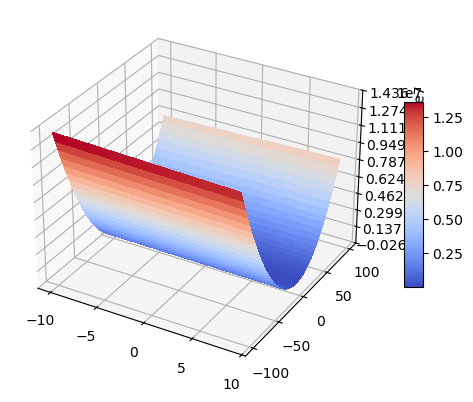

In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
w1 = np.arange(-10, 10)
w2 = np.arange(-100, 100)
#b=np.arange(-100, 100)
w1, w2 = np.meshgrid(w1, w2)
cost=(1/3)*((150-(3*w1+10*w2))**2+(500-(5*w1+50*w2))**2+(625-(4*w1+25*w2))**2)
#cost=(1/3)*((150-3*w1+10*w2+b)**2+(500-5*w1+50*w2+b)**2+(625-4*w1+25*w2+b)**2)
# Plot the surface.
surf = ax.plot_surface(w1, w2, cost, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


ax.zaxis.set_major_locator(LinearLocator(10))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()